### Youtube Trend Analysis

In [1]:
#loads in packages

import numpy as np
import pandas as pd
import datetime
import json
import seaborn as sns
import matplotlib.pyplot
from matplotlib import pyplot as plt

In [2]:
# Load data 
US_data = pd.read_csv('./Resources_Youtube/US_youtube_trending_data.csv')

display(US_data.tail())
print(US_data.columns)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
126985,F4Z0GHWHe60,Official Trailer | Chip n’ Dale: Rescue Ranger...,2022-04-27T14:00:05Z,UCuaFvcY4MhZY3U43mMt1dYQ,Walt Disney Studios,1,2022-05-04T00:00:00Z,Chip N Dale|Rescue Rangers|Movie|Disney|Disney...,1771883,20902,0,0,https://i.ytimg.com/vi/F4Z0GHWHe60/default.jpg,False,False,“So you’re saying the Rescue Rangers are back?...
126986,yy1X6ThVNyM,Young Nudy x BabyDrill - Duntsane (Official Vi...,2022-04-27T16:00:16Z,UCQUsq24C0yX_ezzQYj2IjXw,Young Nudy,24,2022-05-04T00:00:00Z,Young Nudy|Rich Shooter|Dr.EV4L|Young Nudy Ric...,456629,21542,0,826,https://i.ytimg.com/vi/yy1X6ThVNyM/default.jpg,False,False,Stream/Download: https://youngnudy.lnk.to/dunt...
126987,F-kvFACZ5yE,Denzel Washington Reveals the Aftermath of Wil...,2022-04-03T14:58:54Z,UCjQbTcszB-gRhDByY9WhySw,T.D. Jakes,29,2022-05-04T00:00:00Z,denzel washington interview|discovering the de...,6045361,71043,0,19442,https://i.ytimg.com/vi/F-kvFACZ5yE/default.jpg,False,False,During the 2022 International Leadership Summi...
126988,YLC1_XYLDFc,EXCLUSIVE: Woman seen coughing on Uber driver ...,2022-04-28T02:00:05Z,UCYUbNjkuE4lsr2v1Id2O1oA,ABC7 News Bay Area,25,2022-05-04T00:00:00Z,Arna Kimiai|woman coughs on uber driver|viral ...,758418,8159,0,3265,https://i.ytimg.com/vi/YLC1_XYLDFc/default.jpg,False,False,The woman in a viral March 2021 video seen cou...
126989,FHwsGidqX_4,B-Lovee - Bam Bam (Official Music Video),2022-04-27T22:00:12Z,UCHI08eUeImjSW6x9LJP02LA,B Lovee,10,2022-05-04T00:00:00Z,B lovee|b lovee unreleased|b lovee my everythi...,357352,16555,0,735,https://i.ytimg.com/vi/FHwsGidqX_4/default.jpg,False,False,Instagram // @blovee.1Twitter // @Blovee10 EP ...


Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')


In [ ]:
#unique count
US_data.categoryId.nunique()
US_data.tail()

In [4]:
#Which content has the highest viewcount? BTS!
US_data[US_data["view_count"].idxmax():US_data["view_count"].idxmax()+1]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...


In [5]:
#Correaltion of user interactions
interaction_lists = ['view_count', 'likes', 'dislikes', 'comment_count']
correlation_data = US_data[interaction_lists].corr()
display(correlation_data)

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.840102,0.637818,0.513769
likes,0.840102,1.000000,0.618262,0.686021
dislikes,0.637818,0.618262,1.000000,0.519320
comment_count,0.513769,0.686021,0.519320,1.000000


Based on Pearson correlation values:

       1 = a strong positive correlation
       
       0 = no correlation
       
      -1 = strong negative correlation.

This shows that there is a strong positive correlation with number of likes and view_count, while there is a moderate correlation between view_count and comment_count

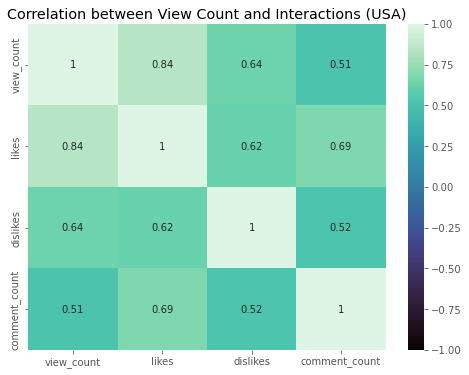

In [6]:
# Using Heatmap from Seaborn to help visualized the correlation. The lighter the color, the higher the correlation

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(correlation_data,annot=True,vmin=-1,vmax=1,cmap="mako")
ax.set(title='Correlation between View Count and Interactions (USA)')

plt.savefig('Images_YouTube/Correlation_US.png')  
plt.show()

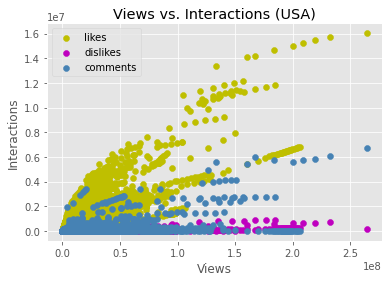

In [7]:
#Using scatter plot to display the relationship between view count and user interaction. 

ax = plt.subplot()
ax.scatter(US_data['view_count'], US_data['likes'], color='y')
ax.scatter(US_data['view_count'], US_data['dislikes'], color='m')
ax.scatter(US_data['view_count'], US_data['comment_count'], color='steelblue')
ax.set(title='Views vs. Interactions (USA)', xlabel='Views', ylabel='Interactions')
ax.legend(['likes', 'dislikes', 'comments'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0)
plt.savefig('Images_YouTube/View_and_Interactions_US.png')  

plt.show()


Hypothesis: The relationship between view count and user interactions has a positive correlation. As views increases, interactions consists of likes, dislikes,and comments will increase as well. 

Conclusion: Based on Pearson values, there is a strong relationship between view counts and user intereactions, espeically number of likes. However, the scatter plot above rejects the hypothesis. There is a positive correlation at the beginning but at a particular point, as view count increased, the overall number of user interactions decreased. This begs the question of what else is the determining factor of trends in Youtube algorithm.

In [8]:
#Loading in data of all 10 countries
#Creating a master data that contains 10 countries, dropping inrelevant columns

column_list = ['video_id', 'view_count', 'likes', 'dislikes', 'comment_count']

US_data = pd.read_csv('./Resources_Youtube/US_youtube_trending_data.csv', usecols=column_list) #USA
CA_data = pd.read_csv('./Resources_Youtube/CA_youtube_trending_data.csv', usecols=column_list) #Canada
DE_data = pd.read_csv('./Resources_Youtube/DE_youtube_trending_data.csv', usecols=column_list) #Germany
FR_data = pd.read_csv('./Resources_Youtube/FR_youtube_trending_data.csv', usecols=column_list) #France
GB_data = pd.read_csv('./Resources_Youtube/GB_youtube_trending_data.csv', usecols=column_list) #United Kingdom (Great Brittain)
IN_data = pd.read_csv('./Resources_Youtube/IN_youtube_trending_data.csv', usecols=column_list) #India
JP_data = pd.read_csv('./Resources_Youtube/JP_youtube_trending_data.csv', usecols=column_list) #Japan
KR_data = pd.read_csv('./Resources_Youtube/KR_youtube_trending_data.csv', usecols=column_list) #South Korea
MX_data = pd.read_csv('./Resources_Youtube/MX_youtube_trending_data.csv', usecols=column_list) #Mexico
RU_data = pd.read_csv('./Resources_Youtube/RU_youtube_trending_data.csv', usecols=column_list) #Russia


df_list = [US_data, CA_data, DE_data, FR_data, GB_data, IN_data, JP_data, KR_data, MX_data, RU_data]
df_country_list = ['United States', 'Canada', 'Germany', 'France', 'Great Brittain', 'India',
                'Japan', 'South Korea', 'Mexico', 'Russia']

views_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count'])
likes_df = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count'])


In [9]:
#Performing While loop to display correlation between views and interactions to all 10 countries listed above

count = 0
while count != 10:
    print(df_country_list[count])
    current_df = df_list[count]
    _x = current_df[column_list].corr()
    display(_x)
    views_df.loc[count] = _x.loc['view_count']
    likes_df.loc[count] = _x.loc['likes']
    count += 1


United States


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.840102,0.637818,0.513769
likes,0.840102,1.000000,0.618262,0.686021
dislikes,0.637818,0.618262,1.000000,0.519320
comment_count,0.513769,0.686021,0.519320,1.000000


Canada


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.831462,0.675911,0.503109
likes,0.831462,1.000000,0.612685,0.681070
dislikes,0.675911,0.612685,1.000000,0.498408
comment_count,0.503109,0.681070,0.498408,1.000000


Germany


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.841766,0.638988,0.497104
likes,0.841766,1.000000,0.592642,0.676079
dislikes,0.638988,0.592642,1.000000,0.509322
comment_count,0.497104,0.676079,0.509322,1.000000


France


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.879095,0.671290,0.734203
likes,0.879095,1.000000,0.643345,0.799008
dislikes,0.671290,0.643345,1.000000,0.627524
comment_count,0.734203,0.799008,0.627524,1.000000


Great Brittain


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.828672,0.652732,0.507462
likes,0.828672,1.000000,0.591110,0.682967
dislikes,0.652732,0.591110,1.000000,0.493134
comment_count,0.507462,0.682967,0.493134,1.000000


India


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.806527,0.143159,0.486827
likes,0.806527,1.000000,0.085923,0.641379
dislikes,0.143159,0.085923,1.000000,0.163144
comment_count,0.486827,0.641379,0.163144,1.000000


Japan


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.902337,0.669529,0.819712
likes,0.902337,1.000000,0.659456,0.835140
dislikes,0.669529,0.659456,1.000000,0.635590
comment_count,0.819712,0.835140,0.635590,1.000000


South Korea


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.888471,0.663981,0.810883
likes,0.888471,1.000000,0.664089,0.822382
dislikes,0.663981,0.664089,1.000000,0.648315
comment_count,0.810883,0.822382,0.648315,1.000000


Mexico


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.851887,0.635165,0.716935
likes,0.851887,1.000000,0.605773,0.756050
dislikes,0.635165,0.605773,1.000000,0.576695
comment_count,0.716935,0.756050,0.576695,1.000000


Russia


,view_count,likes,dislikes,comment_count
view_count,1.000000,0.861646,0.549748,0.653999
likes,0.861646,1.000000,0.540789,0.765216
dislikes,0.549748,0.540789,1.000000,0.508976
comment_count,0.653999,0.765216,0.508976,1.000000


In [10]:
#Combine all data
Master_data = pd.DataFrame(columns=['view_count', 'likes', 'dislikes', 'comment_count', 'country'])

In [11]:
# Performing While loop to create a master dataframe with all the data from all countries

count = 0
entries = 0
while count != 10:
    current_df = df_list[count]
    entries = entries + len(current_df)
    country_name = df_country_list[count]
    current_df['country'] = country_name
    Master_data = pd.merge(Master_data, current_df, how='outer')
    count += 1
print(entries)

1258451


In [12]:
# Perform Pearson correlation values, to compare with USA results
Master_data[column_list].corr()

,view_count,likes,dislikes,comment_count
view_count,1.000000,0.845266,0.227260,0.608256
likes,0.845266,1.000000,0.196616,0.730380
dislikes,0.227260,0.196616,1.000000,0.202419
comment_count,0.608256,0.730380,0.202419,1.000000


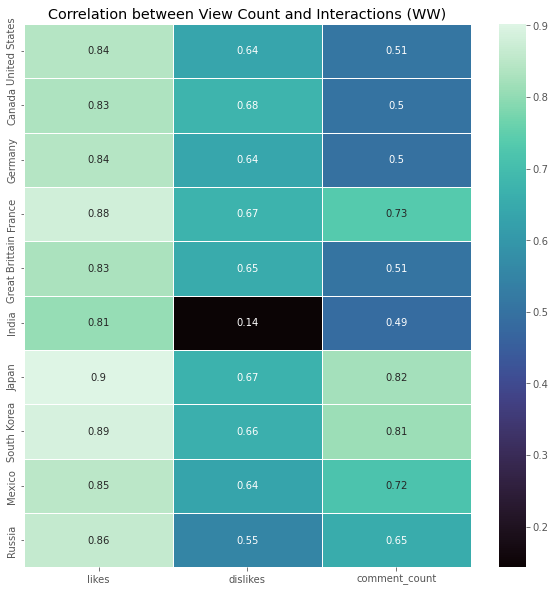

In [13]:
# Using Heatmap from Seaborn to help visualized the correlation. The lighter the color, the higher the correlation
views_df = views_df.drop(axis=1, labels='view_count')
views_df.index = df_country_list
matplotlib.pyplot.figure(figsize=(10,10))
ax = sns.heatmap(views_df, annot=True, linewidths=.5, cmap ='mako')
ax.set(title='Correlation between View Count and Interactions (WW)')

plt.savefig('Images_YouTube/Correlation_WorldWide.png')  
plt.show()


Analysis: 

We can see that all ten countries does have strong correlation between View Counts and nunber of likes. There is an interesting find of India having number of dislikes misrepresente in the data. But without seeing this data in a timelapse format, it's hard to determine if a particular variable is the cause of the other.

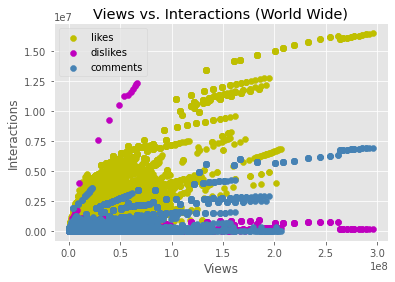

In [14]:
#Showing correlation in scatter plot

ax = plt.subplot()
ax.scatter(Master_data['view_count'], Master_data['likes'], color='y')
ax.scatter(Master_data['view_count'], Master_data['dislikes'], color='m')
ax.scatter(Master_data['view_count'], Master_data['comment_count'], color='steelblue')
ax.set(title='Views vs. Interactions (World Wide)', xlabel='Views', ylabel='Interactions')
ax.legend(['likes', 'dislikes', 'comments'])
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0)
plt.savefig('Images_YouTube/View_and_Interactions_WW.png')  

plt.show()

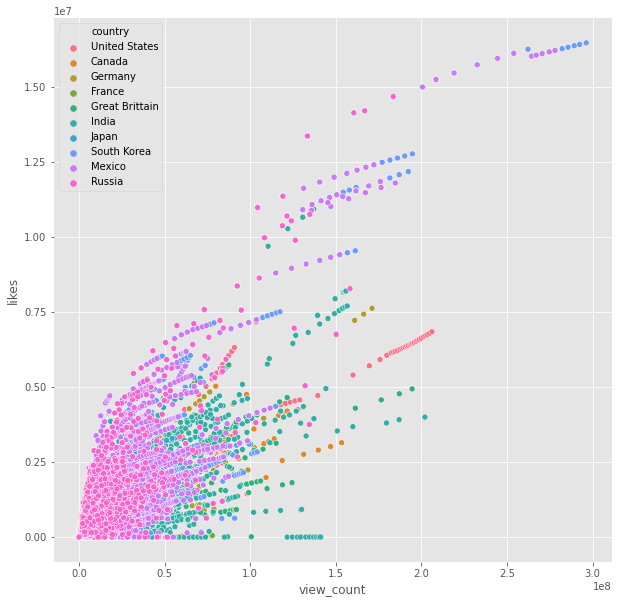

In [15]:
#Bonus graph, since the correlation between views and number of likes is signicicant,
# I thought it'd be more clear to see number of likes and viewcount alone in a scatter plot
matplotlib.pyplot.figure(figsize=(10,10))
sns.scatterplot(x=Master_data["view_count"], y=Master_data['likes'], hue=Master_data["country"])
sns.despine(bottom=True, left=True);

Conclusion:

To test whether our conclusion applies to international trends as well, we performed the same method to find correlation and relationship between view counts and user interactions in 10 different countries. Our findings are consistent with US data. 